In [1]:
import pandas as pd
import seaborn as sns

path = "C:/Users/pierr/Documents/1_projet_python/Valeur_fonciere/Depot_data/"

In [14]:
#Test sur le csv concat
df = pd.read_csv(filepath_or_buffer= path + "concat.csv", sep="|", decimal=",")

C:\Users\pierr\AppData\Local\Temp\ipykernel_15240\1927095249.py:2: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath_or_buffer= path + "concat.csv", sep="|", decimal=",")


In [143]:
dff = df.sample(n = 100000)

In [15]:
#liste des variables
var = df.columns
var
"""
0 Date mutation
1 Nature mutation
2 Valeur fonciere
3 Type de voie
4 Code postal
5 Commune
6 Code departement
7 Code commune
8 Nombre de lots
9 Code type local
10 Type local
11 Surface reelle bati
12 Nombre pieces principales
13 Nature culture
14 Surface terrain
"""

'\n0 Date mutation\n1 Nature mutation\n2 Valeur fonciere\n3 Type de voie\n4 Code postal\n5 Commune\n6 Code departement\n7 Code commune\n8 Nombre de lots\n9 Code type local\n10 Type local\n11 Surface reelle bati\n12 Nombre pieces principales\n13 Nature culture\n14 Surface terrain\n'

In [4]:
df['Type local'].unique()

array(['Maison', 'Appartement',
       'Local industriel. commercial ou assimilé', 'Dépendance'],
      dtype=object)

In [16]:
d_type = {
    'Code commune' : 'str',
    'Valeur fonciere' : 'float',
    'Surface reelle bati' : 'float',
    'Nombre pieces principales' : 'float',
    'Nature culture' : 'bool',
    'Surface terrain' : 'float'
}


df = df.astype(d_type)
df[var[0]] = pd.to_datetime(df[var[0]], format="%d/%m/%Y")
df[var[[2,12]]] = df[var[[2,12]]].astype('int')

#drop valeur fonciere outlier
Q1 = df[var[2]].quantile(0.25)
Q3 = df[var[2]].quantile(0.75)
IQR = Q3 - Q1

df = df[(df[var[2]] >= Q1 - 1.5 * IQR) & (df[var[2]] <= Q3 + 1.5 * IQR)]

#drop Surface réelle outlier
Q1 = df[var[11]].quantile(0.25)
Q3 = df[var[11]].quantile(0.75)
IQR = Q3 - Q1

df = df[(df[var[11]] >= Q1 - 1.5 * IQR) & (df[var[11]] <= Q3 + 1.5 * IQR)]

#drop Nombre pièce principales
Q1 = df[var[12]].quantile(0.25)
Q3 = df[var[12]].quantile(0.75)
IQR = Q3 - Q1

df = df[(df[var[12]] >= Q1 - 1.5 * IQR) & (df[var[12]] <= Q3 + 1.5 * IQR)]

#drop Surface terrain
Q1 = df[var[14]].quantile(0.25)
Q3 = df[var[14]].quantile(0.75)
IQR = Q3 - Q1

df = df[(df[var[14]] >= Q1 - 1.5 * IQR) & (df[var[14]] <= Q3 + 1.5 * IQR)]

#On sépare en 4 df

df_m = df[df['Type local'] == 'Maison']
df_a = df[df['Type local'] == 'Appartement']
df_l = df[df['Type local'] == 'Local industriel. commercial ou assimilé']
df_d = df[df['Type local'] == 'Dépendance']



In [67]:
df_am = pd.concat([df_m, df_a], axis=0)

In [65]:
df_aml.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1936728 entries, 0 to 2240824
Data columns (total 15 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   Date mutation              datetime64[ns]
 1   Nature mutation            int8          
 2   Valeur fonciere            int32         
 3   Type de voie               int8          
 4   Code postal                object        
 5   Commune                    int16         
 6   Code departement           int8          
 7   Code commune               object        
 8   Nombre de lots             int64         
 9   Code type local            object        
 10  Type local                 object        
 11  Surface reelle bati        float64       
 12  Nombre pieces principales  int32         
 13  Nature culture             bool          
 14  Surface terrain            float64       
dtypes: bool(1), datetime64[ns](1), float64(2), int16(1), int32(2), int64(1), int8(3), object

count    20191.000000
mean        79.786241
std         52.599200
min          0.000000
25%         40.000000
50%         80.000000
75%        120.000000
max        176.000000
Name: Surface reelle bati, dtype: float64

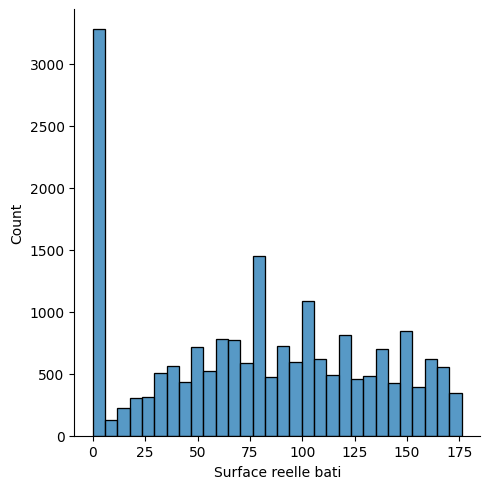

In [51]:
sns.displot(df_l[var[11]])
df_l[var[11]].describe()

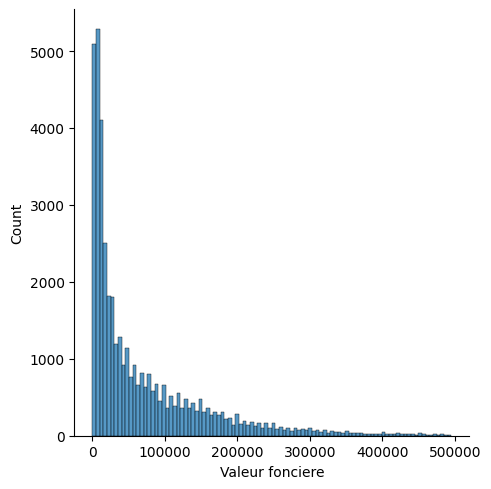

In [27]:
sns.displot(df_d, x=var[2])

In [41]:

for col in var[[1,3,5,6,]]:
    #Conversion du type de variable en variable catégorique
    df_l[col] = df_l[col].astype('category')
    df_l[col] = df_l[col].cat.codes


C:\Users\pierr\AppData\Local\Temp\ipykernel_15240\1971411373.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_l[col] = df_l[col].astype('category')
C:\Users\pierr\AppData\Local\Temp\ipykernel_15240\1971411373.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_l[col] = df_l[col].cat.codes
C:\Users\pierr\AppData\Local\Temp\ipykernel_15240\1971411373.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

In [ ]:
sns.pairplot(dff, hue=var[10])

,Nature mutation,Valeur fonciere,Type de voie,Commune,Code departement,Nombre de lots,Surface reelle bati,Nombre pieces principales,Nature culture,Surface terrain
Nature mutation,1.000000,0.053959,-0.011419,-0.025140,0.012699,0.028216,-0.027154,-0.027665,-0.042626,-0.027294
Valeur fonciere,0.053959,1.000000,-0.086288,0.089213,0.120100,-0.080461,0.345838,0.315900,0.114347,0.198019
Type de voie,-0.011419,-0.086288,1.000000,0.130280,-0.001405,-0.206047,0.100348,0.084462,0.228172,0.123248
Commune,-0.025140,0.089213,0.130280,1.000000,-0.026664,-0.501557,0.329227,0.309898,0.564951,0.386860
Code departement,0.012699,0.120100,-0.001405,-0.026664,1.000000,0.031114,-0.024519,-0.000362,-0.030800,-0.019301
Nombre de lots,0.028216,-0.080461,-0.206047,-0.501557,0.031114,1.000000,-0.442825,-0.414407,-0.847385,-0.565729
Surface reelle bati,-0.027154,0.345838,0.100348,0.329227,-0.024519,-0.442825,1.000000,0.806657,0.553082,0.529571
Nombre pieces principales,-0.027665,0.315900,0.084462,0.309898,-0.000362,-0.414407,0.806657,1.000000,0.529300,0.470877
Nature culture,-0.042626,0.114347,0.228172,0.564951,-0.030800,-0.847385,0.553082,0.529300,1.000000,0.628711
Surface terrain,-0.027294,0.198019,0.123248,0.386860,-0.019301,-0.565729,0.529571,0.470877,0.628711,1.000000


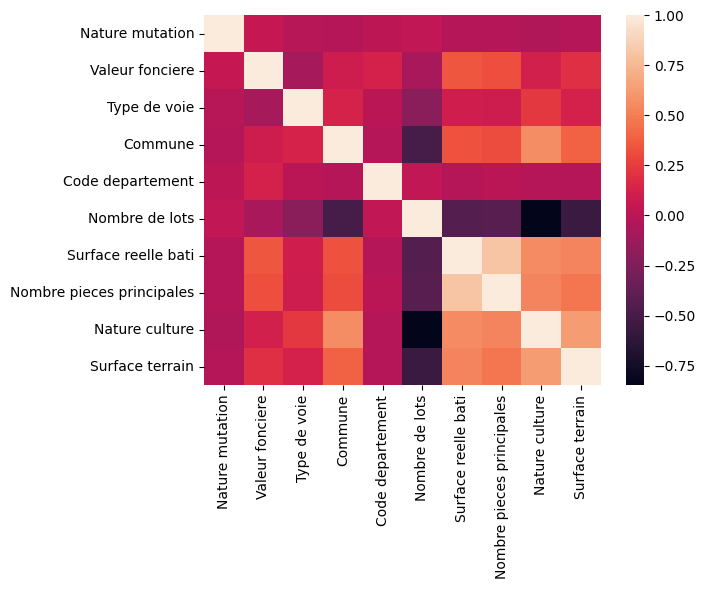

In [60]:
m = df_am.corr(numeric_only=True)
sns.heatmap(m)
m

<Axes: xlabel='Type local', ylabel='Valeur fonciere'>

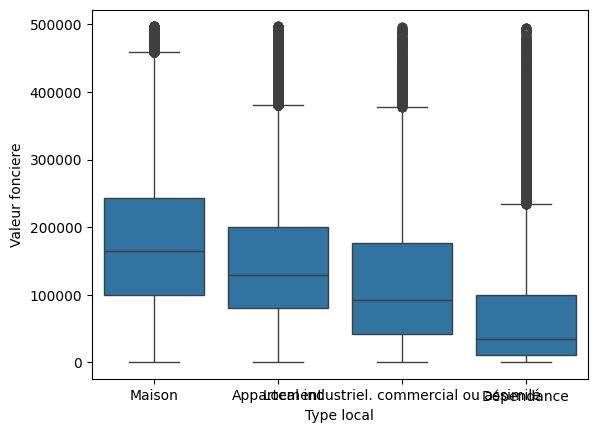

In [123]:
sns.boxplot(df, x='Type local', y='Valeur fonciere')

In [9]:
df[var[2]].describe()

count    2.243664e+06
mean     2.310467e+05
std      1.576010e+06
min      0.000000e+00
25%      9.300000e+04
50%      1.600000e+05
75%      2.545000e+05
max      6.295914e+08
Name: Valeur fonciere, dtype: float64

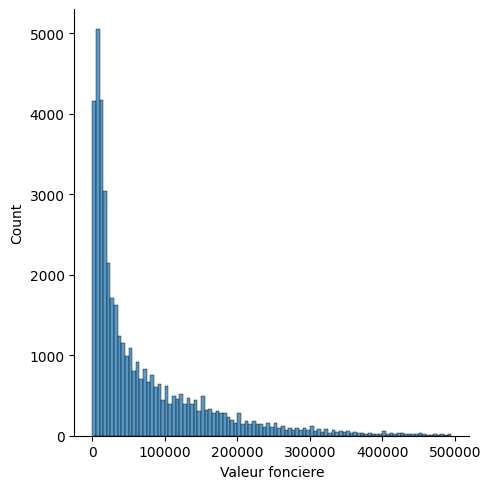

In [15]:
sns.displot(df_no_outliers[df_no_outliers[var[10]] == 'Dépendance'], x = var[2])

<Axes: xlabel='Type local', ylabel='Valeur fonciere'>

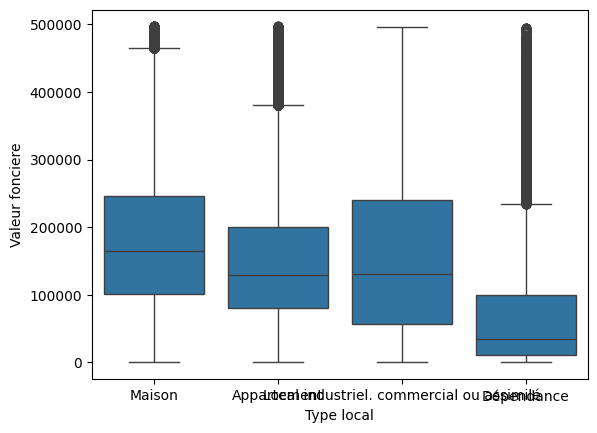

In [11]:
sns.boxplot(df_no_outliers, x='Type local', y='Valeur fonciere')

In [39]:
corr = df_no_outliers.corr( numeric_only = True)
corr

,Valeur fonciere,Nombre de lots,Surface reelle bati,Nombre pieces principales,Nature culture,Surface terrain
Valeur fonciere,1.000000,-0.069673,0.054872,0.322026,0.102316,0.048800
Nombre de lots,-0.069673,1.000000,-0.075476,-0.299356,-0.838133,-0.161705
Surface reelle bati,0.054872,-0.075476,1.000000,0.012817,0.086347,0.226034
Nombre pieces principales,0.322026,-0.299356,0.012817,1.000000,0.394728,0.060461
Nature culture,0.102316,-0.838133,0.086347,0.394728,1.000000,0.145261
Surface terrain,0.048800,-0.161705,0.226034,0.060461,0.145261,1.000000


In [51]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2243664 entries, 0 to 2243663
Data columns (total 15 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   Date mutation              datetime64[ns]
 1   Nature mutation            object        
 2   Valeur fonciere            int32         
 3   Type de voie               object        
 4   Code postal                object        
 5   Commune                    object        
 6   Code departement           object        
 7   Code commune               object        
 8   Nombre de lots             int64         
 9   Code type local            object        
 10  Type local                 object        
 11  Surface reelle bati        float64       
 12  Nombre pieces principales  int32         
 13  Nature culture             bool          
 14  Surface terrain            float64       
dtypes: bool(1), datetime64[ns](1), float64(2), int32(2), int64(1), object(8)
memory usa

,Date mutation,Nature mutation,Valeur fonciere,Type de voie,Code postal,Commune,Code departement,Code commune,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Nature culture,Surface terrain
0,2018-01-04,Vente,90000,RUE,1380.0,SAINT-CYR-SUR-MENTHON,1,343,0,1.0,Maison,150.0,3,True,347.0
1,2018-01-04,Vente,67000,ALL,1000.0,BOURG-EN-BRESSE,1,53,1,2.0,Appartement,45.0,1,False,0.0
2,2018-01-11,Vente,76200,RUE,1000.0,BOURG-EN-BRESSE,1,53,2,2.0,Appartement,68.0,3,False,0.0
3,2018-01-09,Vente,90000,RUE,1380.0,BAGE-DOMMARTIN,1,25,0,1.0,Maison,120.0,3,True,2416.0
4,2018-01-12,Vente,130000,RUE,1160.0,VARAMBON,1,430,0,1.0,Maison,80.0,3,True,55.0


In [72]:
var1 = var[[0,3,4,8,11,12,13,14]]

In [73]:
var1 = var[[1,3,6,10]]
for col in df[var1].columns:
    #Conversion du type de variable en variable catégorique
    df[col] = df[col].astype('category')
    df[col] = df[col].cat.codes

In [75]:
df[var[1]].unique()

array([3, 5, 0, 1, 4, 2], dtype=int8)

In [54]:
corr = df.corr( numeric_only = True)
corr

,Valeur fonciere,Nombre de lots,Surface reelle bati,Nombre pieces principales,Nature culture,Surface terrain
Valeur fonciere,1.000000,-0.006695,0.169517,0.012595,0.010587,0.070750
Nombre de lots,-0.006695,1.000000,-0.054942,-0.279088,-0.833527,-0.131201
Surface reelle bati,0.169517,-0.054942,1.000000,-0.041249,0.060287,0.310816
Nombre pieces principales,0.012595,-0.279088,-0.041249,1.000000,0.376578,0.018581
Nature culture,0.010587,-0.833527,0.060287,0.376578,1.000000,0.114522
Surface terrain,0.070750,-0.131201,0.310816,0.018581,0.114522,1.000000


In [40]:
dff = df.sample(n = 10000)

In [20]:
#Random forest

"""
param_grid = {'n_estimators': [50, 100, 200],  # Number of decision trees in the forest
              'max_depth': [5, 10, 20],  # Maximum depth of each tree
              'min_samples_split': [50, 100],  # Minimum samples required to split an internal node
              'min_samples_leaf': [10, 20, 40],  # Minimum samples required to be a leaf node
}
"""


#module
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

#Variable a tester
var1 = var[10]
print("Variables utilisé : " + str(var1))

#données de test
Y = df_no_outliers['Valeur fonciere']
X = df_no_outliers[var1] 

#pretraitement
X = pd.get_dummies(data=X, columns=var[[0]])

#Echantillonage
X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size = 0.30,
                                                    random_state = 42)

#modèle
reg = RandomForestRegressor(n_estimators = 50, max_depth= 10, min_samples_split= 10, min_samples_leaf= 50)

#entrainement
reg.fit(X_train, y_train)

#fit
y_pred = reg.predict(X_test)

#prediction
mse = mean_squared_error(y_test, y_pred= y_pred, squared= False)
r2 = r2_score(y_test, y_pred)

#print
print("RMSE : " + str(mse))
print("R² : " + str(r2))

Variables utilisé : Type local
RMSE : 104329.43657315461
R² : 0.03477662322175801


In [66]:
#Random forest

"""
param_grid = {'n_estimators': [50, 100, 200],  # Number of decision trees in the forest
              'max_depth': [5, 10, 20],  # Maximum depth of each tree
              'min_samples_split': [50, 100],  # Minimum samples required to split an internal node
              'min_samples_leaf': [10, 20, 40],  # Minimum samples required to be a leaf node
}
"""


#module
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

#Variable a tester
var1 = var[[12, 11, 14]]
print("Variables utilisé : " + str(var1))

#données de test
Y = df_am['Valeur fonciere']
X = df_am[var1] 

#pretraitement
#X = pd.get_dummies(data=X, columns=var[0])

#Echantillonage
X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size = 0.30,
                                                    random_state = 42)

#modèle
reg = RandomForestRegressor(n_estimators = 100, max_depth= 20, min_samples_split= 10, min_samples_leaf= 50)

#entrainement
reg.fit(X_train, y_train)

#fit
y_pred = reg.predict(X_test)

#prediction
mse = mean_squared_error(y_test, y_pred= y_pred)
r2 = r2_score(y_test, y_pred)

#print
print("RMSE : " + str(mse))
print("R² : " + str(r2))

Variables utilisé : Index(['Nombre pieces principales', 'Surface reelle bati', 'Surface terrain'], dtype='object')
RMSE : 8939045679.047426
R² : 0.17271513069572808


In [ ]:
pd.mean(y_test - y_pred)

In [62]:
#Random forest CR

"""
param_grid = {'n_estimators': [50, 100, 200],  # Number of decision trees in the forest
              'max_depth': [5, 10, 20],  # Maximum depth of each tree
              'min_samples_split': [50, 100],  # Minimum samples required to split an internal node
              'min_samples_leaf': [10, 20, 40],  # Minimum samples required to be a leaf node
}
"""


#module
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

#Variable a tester
var1 = var[[12, 11, 14]]
print("Variables utilisé : " + str(var1))

#données de test
Y = df['Valeur fonciere']
X = df[var1] 

#pretraitement
#X = pd.get_dummies(data=X, columns=var[0])

#Echantillonage
X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size = 0.30,
                                                    random_state = 42)

#CR
varcr = var1
scaler = StandardScaler()
Xtraincr = scaler.fit_transform(X_train)
X_train_cr = pd.DataFrame(Xtraincr)


#modèle
reg = RandomForestRegressor(n_estimators = 100, max_depth= 20, min_samples_split= 10, min_samples_leaf= 50)

#entrainement
reg.fit(X_train_cr, y_train)

#fit
Xtestcr = scaler.transform(X_test)
X_test_cr = pd.DataFrame(Xtestcr)
y_pred = reg.predict(X_test_cr)

#prediction
mse = mean_squared_error(y_test, y_pred= y_pred)
r2 = r2_score(y_test, y_pred)

#print
print("RMSE : " + str(mse))
print("R² : " + str(r2))

Variables utilisé : Index(['Nombre pieces principales', 'Surface reelle bati', 'Surface terrain'], dtype='object')
RMSE : 8904871070.173874
R² : 0.18703474829719413


<Axes: xlabel='Valeur fonciere'>

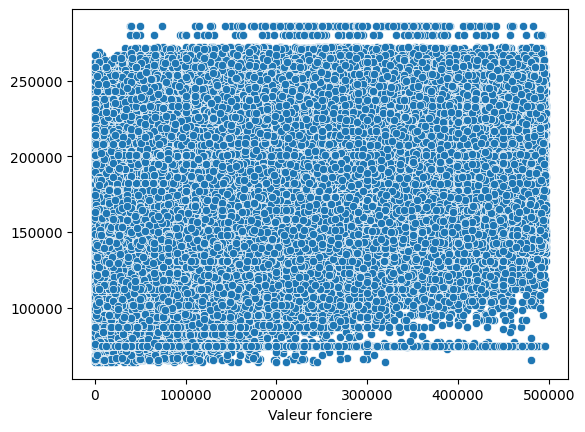

In [30]:
sns.scatterplot(x = y_test, y = y_pred)

In [41]:
df['Type local'].unique()

array(['Maison', 'Appartement',
       'Local industriel. commercial ou assimilé', 'Dépendance'],
      dtype=object)

In [49]:
cond = df_no_outliers['Type local'] != 'Dépendance'
df_nodep = df_no_outliers[cond]
df_nodep['Type local'].unique()

array(['Maison', 'Appartement',
       'Local industriel. commercial ou assimilé'], dtype=object)

In [70]:
df_nodep[df_nodep[var[2]] == 0].describe()

,Date mutation,Valeur fonciere,Nombre de lots,Surface reelle bati,Nombre pieces principales,Surface terrain
count,56,56.0,56.000000,56.000000,56.000000,56.000000
mean,2019-10-06 08:08:34.285714176,0.0,0.125000,1510.875000,1.321429,5111.642857
min,2018-01-11 00:00:00,0.0,0.000000,0.000000,0.000000,0.000000
25%,2018-08-25 12:00:00,0.0,0.000000,77.000000,0.000000,849.250000
50%,2019-07-21 12:00:00,0.0,0.000000,423.000000,0.000000,2136.000000
75%,2020-11-25 12:00:00,0.0,0.000000,1366.250000,4.000000,5648.000000
max,2021-12-30 00:00:00,0.0,2.000000,18051.000000,5.000000,40320.000000
std,NaN,0.0,0.469526,2950.718255,1.859689,7755.304586


<Axes: xlabel='Code postal', ylabel='Valeur fonciere'>

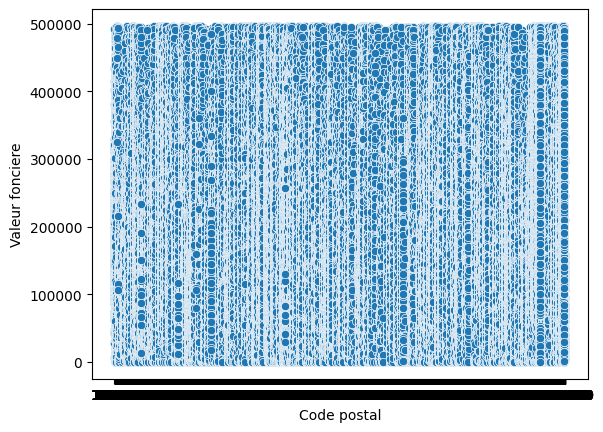

In [72]:
df_test = df_nodep
sns.scatterplot(df_test, x = var[4], y = 'Valeur fonciere')
#sns.barplot(df_nodep, y = 'Valeur fonciere', x = 'Nombre pieces principales')

In [132]:
#Raegression linéaire
"""
param_grid = {'n_estimators': [50, 100, 200],  # Number of decision trees in the forest
              'max_depth': [5, 10, 20],  # Maximum depth of each tree
              'min_samples_split': [50, 100],  # Minimum samples required to split an internal node
              'min_samples_leaf': [10, 20, 40],  # Minimum samples required to be a leaf node
}
"""


#module
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

#Variable a tester
var1 = var[[12, 11]]
print("Variables utilisé : " + str(var1))

#données de test
Y = df['Valeur fonciere']
X = df[var1] 

#pretraitement
#X = pd.get_dummies(data=X, columns=var[[0,3,4]])
#CR
varcr = var1
X = df[varcr] 
scaler = StandardScaler()
Xcr = scaler.fit_transform(X)
pd.DataFrame(Xcr)
X[varcr] = Xcr


#Echantillonage
X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size = 0.30,
                                                    random_state = 42)



#modèle
reg = LinearRegression()

#entrainement
reg.fit(X_train, y_train)

#fit
y_pred = reg.predict(X_test)

#prediction
mse = mean_squared_error(y_test, y_pred= y_pred)
r2 = r2_score(y_test, y_pred)

#print
print("RMSE : " + str(mse))
print("R² : " + str(r2))
coef = pd.DataFrame(reg.coef_ ,index = X_train.columns, columns=['Coef'])
coef.loc['Constante'] = reg.intercept_
coef

Variables utilisé : Index(['Nombre pieces principales', 'Surface reelle bati'], dtype='object')


C:\Users\pierr\AppData\Local\Temp\ipykernel_3176\1496078818.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[varcr] = Xcr


RMSE : 9506815127.946987
R² : 0.12250306139529565


,Coef
Nombre pieces principales,13762.128607
Surface reelle bati,24845.033678
Constante,171202.215214


In [128]:
#Ridge
"""
param_grid = {'n_estimators': [50, 100, 200],  # Number of decision trees in the forest
              'max_depth': [5, 10, 20],  # Maximum depth of each tree
              'min_samples_split': [50, 100],  # Minimum samples required to split an internal node
              'min_samples_leaf': [10, 20, 40],  # Minimum samples required to be a leaf node
}
"""


#module
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

#Variable a tester
var1 = var[[12, 11,14]]
print("Variables utilisé : " + str(var1))

#données de test
Y = df_nodep['Valeur fonciere']
X = df_nodep[var1] 

#pretraitement
#X = pd.get_dummies(data=X, columns=var[[0,3,4]])
#CR
varcr = var1
X = df_nodep[varcr] 
scaler = StandardScaler()
Xcr = scaler.fit_transform(X)
pd.DataFrame(Xcr)
X[varcr] = Xcr


#Echantillonage
X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size = 0.30,
                                                    random_state = 42)



#modèle
reg = Ridge(alpha=9.9)

#entrainement
reg.fit(X_train, y_train)

#fit
y_pred = reg.predict(X_test)

#prediction
mse = mean_squared_error(y_test, y_pred= y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

#print
print("RMSE : " + str(mse))
print("R² : " + str(r2))
coef = pd.DataFrame(reg.coef_ ,index = X_train.columns, columns=['Coef'])
coef.loc['Constante'] = reg.intercept_
coef

Variables utilisé : Index(['Nombre pieces principales', 'Surface reelle bati', 'Surface terrain'], dtype='object')


C:\Users\pierr\AppData\Local\Temp\ipykernel_3176\1012435034.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[varcr] = Xcr


RMSE : 100552.06938857028
R² : 0.0941473400943792


,Coef
Nombre pieces principales,31183.837350
Surface reelle bati,4418.399876
Surface terrain,2665.715891
Constante,173199.427429


In [59]:
from sklearn.model_selection import GridSearchCV
import numpy as np

#gridsearch
parameters = {'alpha': np.arange(start = 0, stop = 10, step = 0.1)}

ridge_model = Ridge()

ridge_model = GridSearchCV(ridge_model, parameters,
                           scoring = 'r2', verbose = 1)
ridge_model.fit(X_train, y_train)

print(ridge_model.best_params_)
print(ridge_model.best_score_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
{'alpha': 9.9}
0.09137901827789104
